<br><p style="margin-left: 25%; font-size:20px;">Machine Learning Camp: HomeWork 4 Section 2</p><br>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Answering Questions from Data: Download the data from [https://github.com/MapsaBootCamp/useful_datasets/blob/master/structuralData/flights.csv ]. Answer the following questions using this data.


In [2]:
flights_df = pd.read_csv("../Data/flights.csv", parse_dates=True, index_col=-1)

In [3]:
flights_df

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute
time_hour,,,,,,,,,,,,,,,,,,
2013-01-01 05:00:00,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15
2013-01-01 05:00:00,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29
2013-01-01 05:00:00,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40
2013-01-01 05:00:00,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45
2013-01-01 06:00:00,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-09-30 14:00:00,2013,9,30,NaN,1455,NaN,NaN,1634,NaN,9E,3393,NaN,JFK,DCA,NaN,213,14,55
2013-09-30 22:00:00,2013,9,30,NaN,2200,NaN,NaN,2312,NaN,9E,3525,NaN,LGA,SYR,NaN,198,22,0
2013-09-30 12:00:00,2013,9,30,NaN,1210,NaN,NaN,1330,NaN,MQ,3461,N535MQ,LGA,BNA,NaN,764,12,10


a) What month had the highest proportion of cancelled flights? What month had the lowest? Interpretany seasonal patterns. Please produce a plot that illustrates the proportion of cancelled flights for each month.

In [4]:
flights_df.resample("M").dep_time.apply(lambda col: col.isna().sum()/len(col)).sort_values().iloc[[0,-1]]

time_hour
2013-10-31    0.008169
2013-02-28    0.050539
Name: dep_time, dtype: float64

In [5]:
flights_df.resample("Q").dep_time.apply(lambda col: col.isna().sum()/len(col)).sort_values().iloc[[0,-1]]

time_hour
2013-12-31    0.017724
2013-03-31    0.032715
Name: dep_time, dtype: float64

<Axes: xlabel='time_hour'>

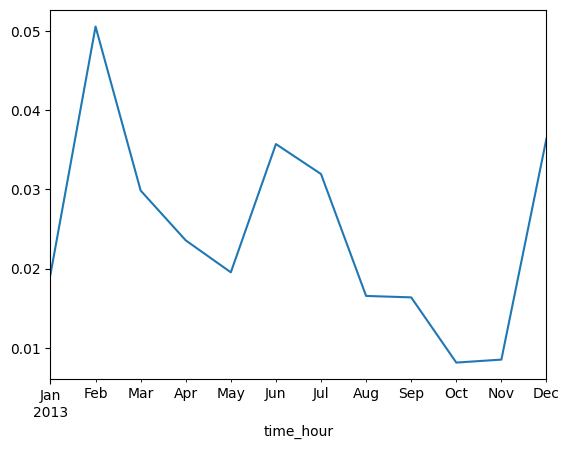

In [6]:
flights_df.resample("M").dep_time.apply(lambda col: col.isna().sum()/len(col)).plot()

b) What plane (specified by the tailnum variable) traveled the most times from New York City airports in 2013? Plot the number of trips per week over the year.

In [7]:
flights_df.origin.unique()

array(['EWR', 'LGA', 'JFK'], dtype=object)

In [8]:
flights_df.tailnum[(flights_df.origin == "LGA") | (flights_df.origin ==  "JFK")].value_counts().idxmax()

'N725MQ'

<Axes: xlabel='time_hour'>

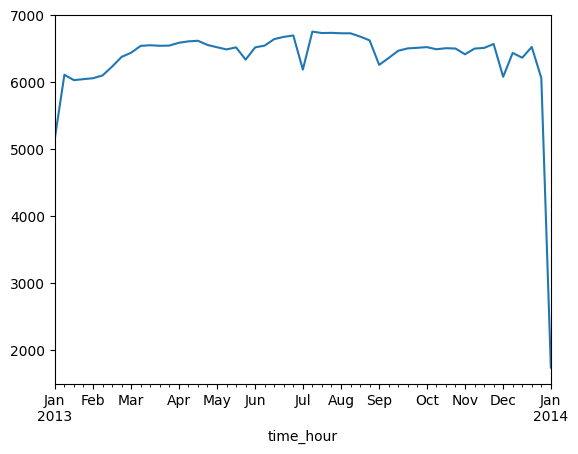

In [9]:
flights_df.resample("W").size().plot()

c) Download the plane data from [ https://github.com/MapsaBootCamp/useful_datasets/blob/master/structuralData/planes.csv ]. Use the flights and planes tables to answer the following questions: What is the oldest plane (specified by the tailnum variable) that flew from New York City airports in 2013? How many airplanes that flew from New York City are included in the planes table?

In [10]:
planes_df = pd.read_csv("../Data/planes.csv")

In [11]:
planes_df

,tailnum,year,type,manufacturer,model,engines,seats,speed,engine
0,N10156,2004.0,Fixed wing multi engine,EMBRAER,EMB-145XR,2,55,NaN,Turbo-fan
1,N102UW,1998.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
2,N103US,1999.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
3,N104UW,1999.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
4,N10575,2002.0,Fixed wing multi engine,EMBRAER,EMB-145LR,2,55,NaN,Turbo-fan
...,...,...,...,...,...,...,...,...,...
3317,N997AT,2002.0,Fixed wing multi engine,BOEING,717-200,2,100,NaN,Turbo-fan
3318,N997DL,1992.0,Fixed wing multi engine,MCDONNELL DOUGLAS AIRCRAFT CO,MD-88,2,142,NaN,Turbo-fan
3319,N998AT,2002.0,Fixed wing multi engine,BOEING,717-200,2,100,NaN,Turbo-fan
3320,N998DL,1992.0,Fixed wing multi engine,MCDONNELL DOUGLAS CORPORATION,MD-88,2,142,NaN,Turbo-jet


In [12]:
merged_df = pd.merge(flights_df, planes_df, on="tailnum")

In [13]:
merged_df

,year_x,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,hour,minute,year_y,type,manufacturer,model,engines,seats,speed,engine
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,...,5,15,1999.0,Fixed wing multi engine,BOEING,737-824,2,149,NaN,Turbo-fan
1,2013,1,8,1435.0,1440,-5.0,1717.0,1746,-29.0,UA,...,14,40,1999.0,Fixed wing multi engine,BOEING,737-824,2,149,NaN,Turbo-fan
2,2013,1,9,717.0,700,17.0,812.0,815,-3.0,UA,...,7,0,1999.0,Fixed wing multi engine,BOEING,737-824,2,149,NaN,Turbo-fan
3,2013,1,9,1143.0,1144,-1.0,1425.0,1445,-20.0,UA,...,11,44,1999.0,Fixed wing multi engine,BOEING,737-824,2,149,NaN,Turbo-fan
4,2013,1,13,835.0,824,11.0,1030.0,951,39.0,UA,...,8,24,1999.0,Fixed wing multi engine,BOEING,737-824,2,149,NaN,Turbo-fan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284165,2013,9,20,1758.0,1805,-7.0,1929.0,1953,-24.0,OO,...,18,5,2005.0,Fixed wing multi engine,BOMBARDIER INC,CL-600-2C10,2,80,NaN,Turbo-fan
284166,2013,9,22,1759.0,1805,-6.0,1945.0,1953,-8.0,OO,...,18,5,2005.0,Fixed wing multi engine,BOMBARDIER INC,CL-600-2C10,2,80,NaN,Turbo-fan
284167,2013,9,23,1759.0,1805,-6.0,1935.0,1953,-18.0,OO,...,18,5,2006.0,Fixed wing multi engine,BOMBARDIER INC,CL-600-2C10,2,80,NaN,Turbo-fan
284168,2013,9,24,1751.0,1805,-14.0,1937.0,1953,-16.0,OO,...,18,5,2009.0,Fixed wing multi engine,BOMBARDIER INC,CL-600-2C10,2,80,NaN,Turbo-fan


In [14]:
merged_df[(merged_df.origin == "LGA") | (merged_df.origin ==  "JFK")].sort_values("year_y").tailnum.iloc[0]

'N381AA'

In [15]:
len(merged_df[(merged_df.origin == "LGA") | (merged_df.origin ==  "JFK")])

169243

d) Use the flights and planes tables to answer the following questions: How many planes have a missing date of manufacture? What are the five most common manufacturers (Note: pay close attention to the same manufacturer being represented multiple times)? Has the distribution of manufacturer changed over time as reflected by the airplanes flying from NYC in 2013? Produce a plot that backs up your claim.

In [16]:
planes_df.year.isna().sum()

70

In [17]:
planes_df.manufacturer.unique()

array(['EMBRAER', 'AIRBUS INDUSTRIE', 'BOEING', 'AIRBUS',
       'BOMBARDIER INC', 'CESSNA', 'JOHN G HESS', 'GULFSTREAM AEROSPACE',
       'SIKORSKY', 'PIPER', 'AGUSTA SPA', 'PAIR MIKE E', 'DOUGLAS',
       'BEECH', 'BELL', 'AVIAT AIRCRAFT INC', 'STEWART MACO',
       'LEARJET INC', 'MCDONNELL DOUGLAS', 'CIRRUS DESIGN CORP',
       'HURLEY JAMES LARRY', 'KILDALL GARY', 'LAMBERT RICHARD',
       'BARKER JACK L', 'AMERICAN AIRCRAFT INC', 'ROBINSON HELICOPTER CO',
       'FRIEDEMANN JON', 'LEBLANC GLENN T', 'MARZ BARRY', 'DEHAVILLAND',
       'CANADAIR', 'CANADAIR LTD', 'MCDONNELL DOUGLAS CORPORATION',
       'MCDONNELL DOUGLAS AIRCRAFT CO', 'AVIONS MARCEL DASSAULT'],
      dtype=object)

In [18]:
planes_df.manufacturer = planes_df.manufacturer.str.replace("AIRBUS INDUSTRIE ", "AIRBUS")
planes_df.manufacturer = planes_df.manufacturer.str.replace("CANADAIR LTD", "CANADAIR")
planes_df.manufacturer = planes_df.manufacturer.str.replace(r"^.*DOUGLAS.*$", "DOUGLAS", regex=True)

In [19]:
planes_df.manufacturer.value_counts().head().index

Index(['BOEING', 'AIRBUS INDUSTRIE', 'BOMBARDIER INC', 'AIRBUS', 'EMBRAER'], dtype='object', name='manufacturer')

## 2. **Working with datetime data;** The object `myDate` contains the date and time. Based on this object answer the following questions and type the answer after your findings.

In [20]:
myDate = "2022-10-01 09:42:43"

a. Convert `myDate` into a datetime object with Iran time zone. Display the result.

In [21]:
myDate = pd.to_datetime(myDate, utc=True).tz_convert("UTC+03:30")
myDate

Timestamp('2022-10-01 13:12:43+0330', tz='UTC+03:30')

b. Write your codes so that it displays the week day and also the month of `myDate`.

In [22]:
print(myDate.strftime("%A"), myDate.strftime("%B"))

Saturday October


c. What weekday and the month is it after exactly 100 years from `myDate`?

In [23]:
x = myDate + pd.offsets.DateOffset(years=100)
print(x.strftime("%A"), x.strftime("%B"))

Thursday October


d. Add two month with myDate and display the resulting date time.

In [24]:
print(myDate + pd.offsets.DateOffset(months=2))

2022-12-01 13:12:43+03:30


e. Suppose this homework is due on December 23, 2022 by 11.59PM. Compute and display how many seconds you got to complete this homework? Also compute the hours.

In [25]:
deadline = pd.to_datetime("2022-12-23 11:59PM", utc=True).tz_convert("UTC+03:30")

In [26]:
(deadline - myDate).seconds

51377

In [27]:
(deadline - myDate).seconds // 3600

14

f. For the years `2021` & `2022`, count the number of weekends. Which year has the highest number of Weekends?

In [28]:
all_dates = pd.date_range(start="2021-01-01", end="2021-12-31")
busines_dates = pd.date_range(start="2021-01-01", end="2021-12-31", freq="B")
weekends_dates = all_dates[~all_dates.isin(busines_dates)]
len(weekends_dates)

104

In [29]:
all_dates = pd.date_range(start="2022-01-01", end="2022-12-31")
busines_dates = pd.date_range(start="2022-01-01", end="2022-12-31", freq="B")
weekends_dates = all_dates[~all_dates.isin(busines_dates)]
len(weekends_dates)

105

g. What is the month(MM) and day(DD) on the `305`th day of the current year?

In [30]:
x = pd.date_range(start="2022-01-01", end="2022-12-31")[304]
print(x.strftime("%m"), x.strftime("%d"))

11 01


h. The Date `2022-10-20` is formatted `YYYY-MM-DD`, format it into `MM-DD-YYYY`

In [31]:
date = pd.to_datetime("2022-10-20")
date.strftime('%m-%d-%Y')

'10-20-2022'

i. Find if the Date on the question above is the weekend or a weekday.

In [32]:
if date.day_name() in ["Saturday", "Sunday"]:
    print("weekend")
else:
    print("weekday")

weekday


## 3. **Walmart Sales Analysis:** load and read the dataset `walmart_sales.csv` and `walmart_fuel_prices.csv`.

We will follow the following data description when working with the above 2 datasets:

 * `index:` index is a default value of count
 * `Store:` Store is represented in number ID(1,2,3,4,...)
 * `Dept:` Dept is Department in each Store represented in number ID (1,2,3,4,...)
 * `Date:` Date is in YYYY-MM-DD char format - *needs to be converted into Date data type*
 * `Weekly_Sales:` Sales of a given Dept in a given Store for the Date
 * `Temperature:` Average temperature on the Date at given Store region
 * `Fuel_Price:` Cost of the Fuel on the given Date at a given Store
 * `IsHoliday:` Is the given Date a holiday Week? 

In [33]:
sales_df = pd.read_csv("../Data/walmart_sales.csv")
fuel_prices_df = pd.read_csv("../Data/walmart_fuel_prices.csv", index_col=0)

In [34]:
sales_df.index = pd.to_datetime(sales_df.Date)
fuel_prices_df.index = pd.to_datetime(fuel_prices_df.Date)

In [35]:
sales_df

,Store,Dept,Date,Weekly_Sales,IsHoliday
Date,,,,,
2010-02-05,1,1,2010-02-05,24924.50,False
2010-02-12,1,1,2010-02-12,46039.49,True
2010-02-19,1,1,2010-02-19,41595.55,False
2010-02-26,1,1,2010-02-26,19403.54,False
2010-03-05,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
2012-09-28,45,98,2012-09-28,508.37,False
2012-10-05,45,98,2012-10-05,628.10,False
2012-10-12,45,98,2012-10-12,1061.02,False


In [36]:
fuel_prices_df

,Store,Date,Temperature,Fuel_Price,IsHoliday
Date,,,,,
2010-02-05,1,2010-02-05,42.31,2.572,False
2010-02-12,1,2010-02-12,38.51,2.548,True
2010-02-19,1,2010-02-19,39.93,2.514,False
2010-02-26,1,2010-02-26,46.63,2.561,False
2010-03-05,1,2010-03-05,46.50,2.625,False
...,...,...,...,...,...
2013-06-28,45,2013-06-28,76.05,3.639,False
2013-07-05,45,2013-07-05,77.50,3.614,False
2013-07-12,45,2013-07-12,79.37,3.614,False


 a. For both datasets, breakdown the `Date` column and create additional new columns `Year`, `Month`, and `Day`. You should now have additional 3 new columns in your both dataset. Report only the column names for both the dataset.

In [37]:
sales_df[["Year", "Month", "Day"]] = sales_df.Date.str.split("-", expand=True)
fuel_prices_df[["Year", "Month", "Day"]] = fuel_prices_df.Date.str.split("-", expand=True)

In [38]:
sales_df.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Year', 'Month',
       'Day'],
      dtype='object')

In [39]:
fuel_prices_df.columns

Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'IsHoliday', 'Year',
       'Month', 'Day'],
      dtype='object')

In [40]:
sales_df = sales_df.drop(columns="Date")
fuel_prices_df = fuel_prices_df.drop(columns="Date")

b. In `walmart_sales`: which `Month(s)` of `Year` have the highest `Weekly_Sales`? Report the Year, Month, Store, and Dept.

In [41]:
total_monthly_sales = sales_df.resample("M").Weekly_Sales.sum()

In [42]:
max = total_monthly_sales.sort_values().index[-1]

In [43]:
sales_df.loc[max, ["Year", "Month", "Store", "Dept"]]

,Year,Month,Store,Dept
Date,,,,
2010-12-31,2010,12,1,1
2010-12-31,2010,12,1,2
2010-12-31,2010,12,1,3
2010-12-31,2010,12,1,4
2010-12-31,2010,12,1,5
...,...,...,...,...
2010-12-31,2010,12,45,93
2010-12-31,2010,12,45,94
2010-12-31,2010,12,45,95


c. In `walmart_sales`: calculate the average monthly sales by Department for each Store. Which Store(s) has the highest average monthly sales on the department(s)? Report the Store, Department, Date.

In [44]:
average_monthly_sales = sales_df.groupby(["Dept", "Store"]).apply(lambda group: group.resample("M").Weekly_Sales.sum().mean())
average_monthly_sales

Dept  Store
1     1         97557.732727
      2        133371.250000
      3         31757.357879
      4        160246.406970
      5         42356.396667
                   ...      
99    39          429.051875
      40          301.273500
      41          954.033500
      43            7.500000
      44            1.402000
Length: 3331, dtype: float64

In [45]:
average_monthly_sales.unstack().apply(lambda row: row.idxmax(), axis=1)

Dept
1     13
2     10
3     10
4      4
5     10
      ..
95    20
96     4
97     2
98    20
99    13
Length: 81, dtype: int64

In [46]:
# TODO Date !?

d. In `walmart_sales`: which month of year `2011` has the highest overall sales by Store? Name the holiday(Labor day, July 4th, Halloween, Thanksgiving, Christmas,... etcs) that falls on the month. After that do the same for `2012`. Does the highest sales per month fall on the same holiday for both years? Report your findings for both year.

In [47]:
max = sales_df.loc["2011"].resample("M").Weekly_Sales.sum().idxmax().month
max

12

In [48]:
df = sales_df.loc[f"2011-{max}"]
df[df.IsHoliday == True].Day.unique()

array(['30'], dtype=object)

In [49]:
max = sales_df.loc["2012"].resample("M").Weekly_Sales.sum().idxmax().month
max

6

In [50]:
df = sales_df.loc[f"2012-{max}"]
df[df.IsHoliday == True].Day.unique()

array([], dtype=object)

 e. In `walmart_sales`: report the lowest sales per month for the year `2011` for `IsHoliday == TRUE`. Name the holiday(Labor day, July 4th, Halloween, Thanksgiving, Christmas,... etcs) that falls on the month. Do the same for `2012` and report if the lowest sales are on the same month.

In [51]:
holidays = sales_df[sales_df.IsHoliday == True]
x = holidays.loc["2011"].resample("M").Weekly_Sales.sum()
lowest_sales = x[x>0].idxmin().month
lowest_sales

12

In [52]:
holidays.loc[f"2011-{lowest_sales}"].Day.unique()

array(['30'], dtype=object)

In [53]:
holidays = sales_df[sales_df.IsHoliday == True]
x = holidays.loc["2012"].resample("M").Weekly_Sales.sum()
lowest_sales = x[x>0].idxmin().month
lowest_sales

9

In [54]:
holidays.loc[f"2012-{lowest_sales}"].Day.unique()

array(['07'], dtype=object)

f. In `walmart_sales`: We have 45 unique stores. Generate a nice plot on the total sales by store for the year `2012`. Report the Store number.

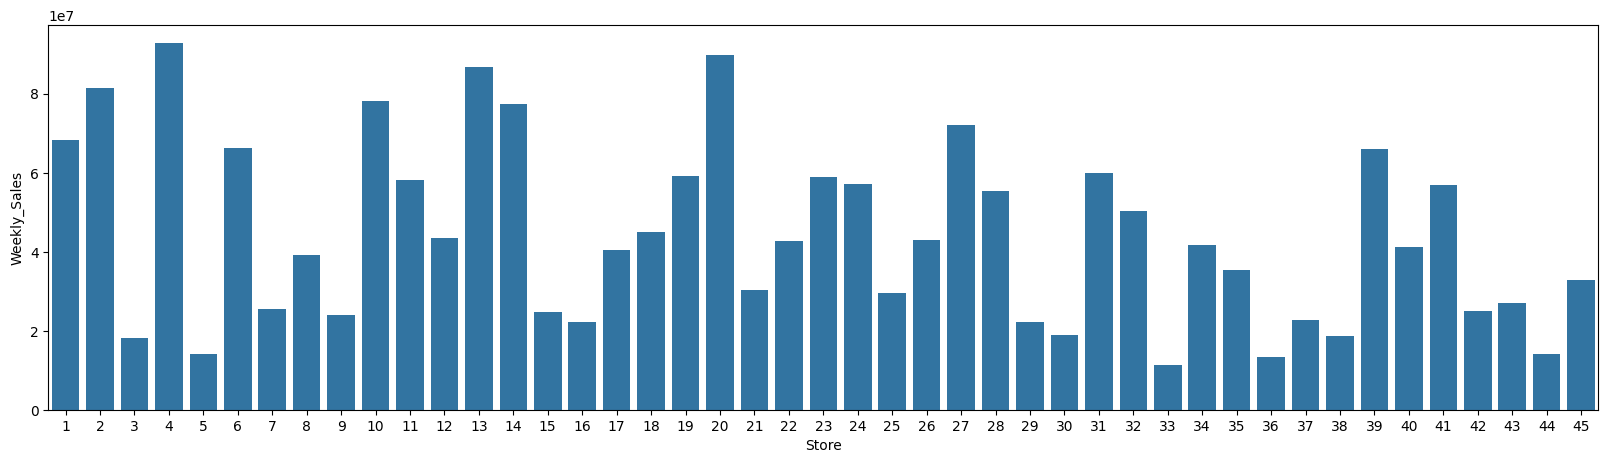

In [55]:
plt.figure(figsize=(20, 5))
x = sales_df.loc["2012"].groupby("Store").Weekly_Sales.sum()
sns.barplot(x)
plt.show()

g. In `walmart_fuel_prices`: For the year `2011` do you think higher the `temperature` relates to higher `fuel price`? Support your answer with a nice plot.

Yes

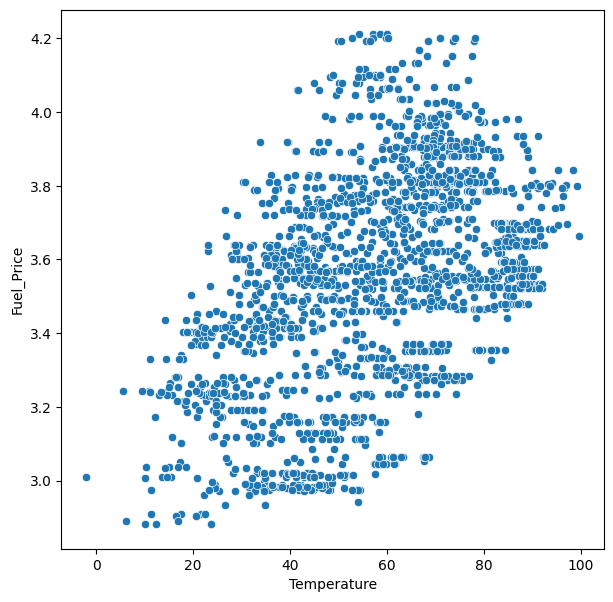

In [56]:
plt.figure(figsize=(7, 7))
df = fuel_prices_df.loc["2011"]
sns.scatterplot(data=df, x="Temperature", y="Fuel_Price")
plt.show()

 h. In `walmart_fuel_prices`: For the year `2010` which `Store` had the lowest Fuel Price? Report the `month` and `temperature`. On the same `month`, what was the highest fuel price for the store? Report the difference.

In [57]:
lowest_fuel_price = fuel_prices_df.loc["2010"].groupby("Store").Fuel_Price.sum().idxmin()
lowest_fuel_price

36

In [58]:
df = fuel_prices_df.loc["2010"]
df[df.Store == lowest_fuel_price][["Store", "Month", "Temperature"]]

,Store,Month,Temperature
Date,,,
2010-02-05,36,02,45.97
2010-02-12,36,02,46.11
2010-02-19,36,02,45.66
2010-02-26,36,02,50.87
2010-03-05,36,03,51.33
2010-03-12,36,03,61.96
2010-03-19,36,03,59.56
2010-03-26,36,03,55.76
2010-04-02,36,04,63.43


i. In `walmart_fuel_prices`: For the `IsHoliday == TRUE`, which month has the lowest `Fuel Price` for the year `2012`? name the holiday(Labor day, July 4th, Halloween, Thanksgiving, Christmas,... etcs) that falls on the month. Also report month of the highest fuel price and name of the holiday.

In [59]:
holidays = fuel_prices_df[fuel_prices_df.IsHoliday == True]

In [60]:
x=holidays.loc["2012"].resample("M").Fuel_Price.sum()
lowest_fuel_price = x[x>0].idxmin().month
lowest_fuel_price

12

In [61]:
holidays.loc[f"2012-{lowest_fuel_price}"].Day.unique()

array(['28'], dtype=object)

In [62]:
x=holidays.loc["2012"].resample("M").Fuel_Price.sum()
highest_fuel_price = x[x>0].idxmax().month
highest_fuel_price

9

In [63]:
holidays.loc[f"2012-{highest_fuel_price}"].Day.unique()

array(['07'], dtype=object)

## 4. **COVID19 Time Series Data:**

<br/>
Download the data from
<a target='_blank' href="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv">[github link]</a>
(https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv) 

<br/>
<br/>
The link above contains a time-series data for COVID-19 confirmed cases in the US. Limit the data to only use `New York State` and please answer the following questions:



In [64]:
covid19_confirmed_df = pd.read_csv("../Data/time_series_covid19_confirmed_US.csv")
covid19_confirmed_df.rename(columns={"Admin2": "County"}, inplace=True)
covid19_confirmed_df

,UID,iso2,iso3,code3,FIPS,County,Province_State,Country_Region,Lat,Long_,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,19732,19759,19759,19759,19759,19759,19759,19759,19790,19790
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,69641,69767,69767,69767,69767,69767,69767,69767,69860,69860
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,7451,7474,7474,7474,7474,7474,7474,7474,7485,7485
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,8067,8087,8087,8087,8087,8087,8087,8087,8091,8091
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,18616,18673,18673,18673,18673,18673,18673,18673,18704,18704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3337,84056039,US,USA,840,56039.0,Teton,Wyoming,US,43.935225,-110.589080,...,12130,12130,12130,12130,12130,12130,12130,12134,12134,12134
3338,84056041,US,USA,840,56041.0,Uinta,Wyoming,US,41.287818,-110.547578,...,6401,6401,6401,6401,6401,6401,6401,6406,6406,6406
3339,84090056,US,USA,840,90056.0,Unassigned,Wyoming,US,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
3340,84056043,US,USA,840,56043.0,Washakie,Wyoming,US,43.904516,-107.680187,...,2750,2750,2750,2750,2750,2750,2750,2755,2755,2755


In [65]:
data_df = covid19_confirmed_df.iloc[:, :11].reset_index()
data_df

,index,UID,iso2,iso3,code3,FIPS,County,Province_State,Country_Region,Lat,Long_,Combined_Key
0,0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,"Autauga, Alabama, US"
1,1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,"Baldwin, Alabama, US"
2,2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,"Barbour, Alabama, US"
3,3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,"Bibb, Alabama, US"
4,4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,"Blount, Alabama, US"
...,...,...,...,...,...,...,...,...,...,...,...,...
3337,3337,84056039,US,USA,840,56039.0,Teton,Wyoming,US,43.935225,-110.589080,"Teton, Wyoming, US"
3338,3338,84056041,US,USA,840,56041.0,Uinta,Wyoming,US,41.287818,-110.547578,"Uinta, Wyoming, US"
3339,3339,84090056,US,USA,840,90056.0,Unassigned,Wyoming,US,0.000000,0.000000,"Unassigned, Wyoming, US"
3340,3340,84056043,US,USA,840,56043.0,Washakie,Wyoming,US,43.904516,-107.680187,"Washakie, Wyoming, US"


In [66]:
dates_df = covid19_confirmed_df.iloc[:, 11:].unstack().reset_index().rename(columns={"level_0": "Date", "level_1": "index", 0: "Confirmed_Cases"})
dates_df.Date = pd.to_datetime(dates_df.Date)
dates_df

/tmp/ipykernel_26195/3411425004.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dates_df.Date = pd.to_datetime(dates_df.Date)


,Date,index,Confirmed_Cases
0,2020-01-22,0,0
1,2020-01-22,1,0
2,2020-01-22,2,0
3,2020-01-22,3,0
4,2020-01-22,4,0
...,...,...,...
3819901,2023-03-09,3337,12134
3819902,2023-03-09,3338,6406
3819903,2023-03-09,3339,0
3819904,2023-03-09,3340,2755


In [67]:
merged_df = pd.merge(dates_df, data_df, on="index")
merged_df.set_index("Date", inplace=True)
merged_df

,index,Confirmed_Cases,UID,iso2,iso3,code3,FIPS,County,Province_State,Country_Region,Lat,Long_,Combined_Key
Date,,,,,,,,,,,,,
2020-01-22,0,0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,"Autauga, Alabama, US"
2020-01-23,0,0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,"Autauga, Alabama, US"
2020-01-24,0,0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,"Autauga, Alabama, US"
2020-01-25,0,0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,"Autauga, Alabama, US"
2020-01-26,0,0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,"Autauga, Alabama, US"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-05,3341,1905,84056045,US,USA,840,56045.0,Weston,Wyoming,US,43.839612,-104.567488,"Weston, Wyoming, US"
2023-03-06,3341,1905,84056045,US,USA,840,56045.0,Weston,Wyoming,US,43.839612,-104.567488,"Weston, Wyoming, US"
2023-03-07,3341,1905,84056045,US,USA,840,56045.0,Weston,Wyoming,US,43.839612,-104.567488,"Weston, Wyoming, US"


a. What is the total confirmed cases in Nebraska as of October 30th 2020 as per the dataset?


In [68]:
nebraska_df = merged_df[merged_df.Province_State == "Nebraska"]
nebraska_df.loc["2020-10-30" :].Confirmed_Cases.sum()

314415004

b. On what date has the highest confirmed cases? Demonstrate using a suitable graph for all the available data.


In [69]:
total_confirmed_cases_per_day = merged_df.resample("D").Confirmed_Cases.sum()
total_confirmed_cases_per_day.idxmax()

Timestamp('2023-03-09 00:00:00')

c. Which County has the highest daily confirmed cases? Report both the County name and the date


In [70]:
merged_df[merged_df.Confirmed_Cases == merged_df.Confirmed_Cases.max()][["County", "Confirmed_Cases"]]

,County,Confirmed_Cases
Date,,
2023-03-09,Los Angeles,3710586


d. Identify two countries that have top total confirmed cases. Generate a time series plot of daily confirm cases for these two countries.
`

In [71]:
county2, county1 = merged_df.groupby("County").Confirmed_Cases.sum().sort_values().index[-2:]
print(county1)
print(county2)

Los Angeles
Maricopa


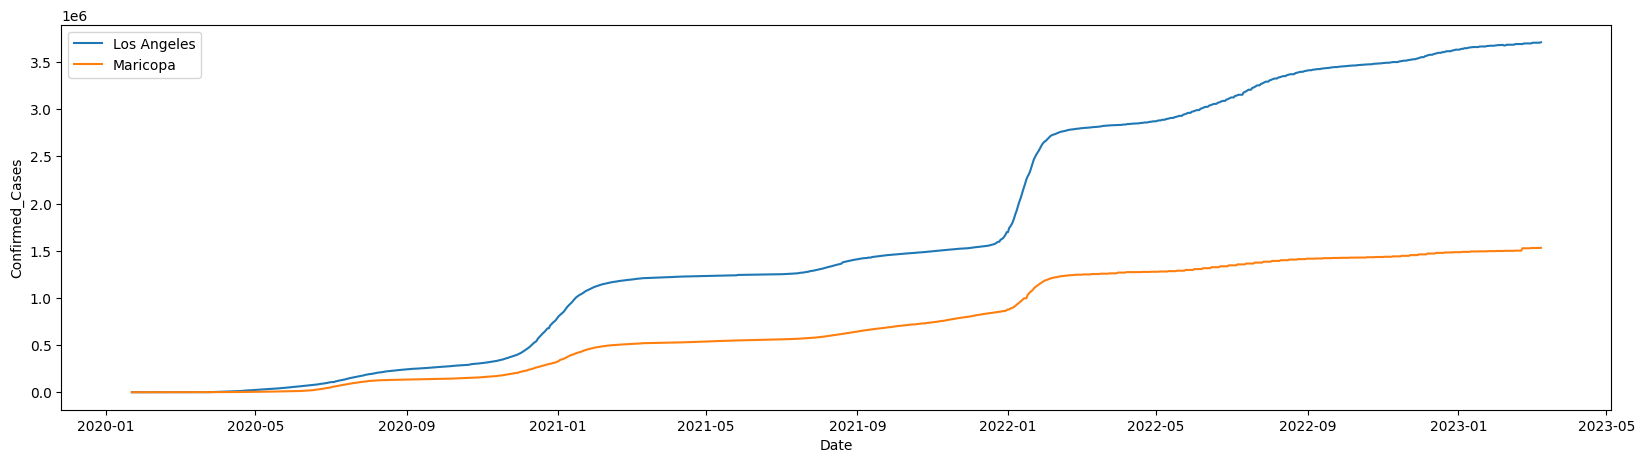

In [72]:
plt.figure(figsize=(20, 5))
plt.plot(merged_df[merged_df.County == county1]["Confirmed_Cases"], label=f"{county1}")
plt.plot(merged_df[merged_df.County == county2]["Confirmed_Cases"], label=f"{county2}")
plt.legend()
plt.xlabel("Date")
plt.ylabel("Confirmed_Cases")
plt.show()

e. Show the total confirmed cases for all the locations in an interactive world map (hint: you may use `leaflet` package in `python`.


In [73]:
import folium
import requests

In [74]:
df = merged_df.groupby("Province_State").agg({"Confirmed_Cases": "sum"}).reset_index()
df

,Province_State,Confirmed_Cases
0,Alabama,872756073
1,Alaska,153011898
2,American Samoa,2608837
3,Arizona,1330372436
4,Arkansas,549955573
5,California,6166190335
6,Colorado,922394521
7,Connecticut,507631287
8,Delaware,171886464
9,Diamond Princess,53306


In [75]:
df.Province_State = df.Province_State.map(
{
    "Alabama": "AL",
    "Alaska": "AK",
    "American Samoa": "AS",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "District of Columbia": "DC",
    "Federated States Of Micronesia": "FM",
    "Florida": "FL",
    "Georgia": "GA",
    "Guam": "GU",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Marshall Islands": "MH",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Northern Mariana Islands": "MP",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Palau": "PW",
    "Pennsylvania": "PA",
    "Puerto Rico": "PR",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virgin Islands": "VI",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY"
})

In [76]:
df.dropna(inplace=True, ignore_index=True)

In [77]:
state_geo = requests.get(
    "https://raw.githubusercontent.com/python-visualization/folium-example-data/main/us_states.json"
).json()
state_data = df

m = folium.Map(location=[48, -102], zoom_start=4)

cp = folium.Choropleth(
    geo_data=state_geo,
    name="choropleth",
    data=state_data,
    columns=["Province_State", "Confirmed_Cases"],
    key_on="feature.id",
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Confirmed_Cases",
).add_to(m)

df_indexed = df.set_index("Province_State")

for s in cp.geojson.data["features"]:
  s["properties"]["Confirmed_Cases"] = df_indexed.loc[s["id"], "Confirmed_Cases"].astype(float)

folium.GeoJsonTooltip(["name", "Confirmed_Cases"],["State", "Total Confirmed Cases"]).add_to(cp.geojson)

folium.LayerControl().add_to(m)

m